In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA

In [ ]:
# Load and preprocess dataset
from google.colab import files
uploaded = files.upload()
file_path = "kddcup.data_10_percent.gz"  # Adjust to uploaded file name
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
    "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate",
    "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
    "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv(file_path, compression="gzip", header=None, names=columns)
df.dropna(inplace=True)
df['label'] = df['label'].apply(lambda x: 'anomaly' if x != 'normal.' else 'normal')

X = df.drop('label', axis=1)
y = df['label']

Saving kddcup.data_10_percent.gz to kddcup.data_10_percent.gz


In [ ]:
# Encode categorical features
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Normalize continuous features
scaler = StandardScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality to 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Split data into train/validation/test sets using PCA-transformed data
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Optional: Display explained variance ratio to understand variance captured by principal components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance_ratio}")
print(f"Total variance explained by 10 components: {explained_variance_ratio.sum()}")

Explained variance ratio by each component: [0.25951826 0.11930528 0.08963061 0.07609761 0.04738793 0.04096794
 0.03058322 0.0292816  0.02907598 0.02610178]
Total variance explained by 10 components: 0.7479502105283208


In [ ]:
# Models: Logistic Regression, Random Forest, KNN, DNN
# Logistic Regression
lr = LogisticRegression(max_iter=500, solver='saga', verbose=1)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

convergence after 426 epochs took 105 seconds


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
# DNN
dnn = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
dnn.fit(X_train, y_train)
dnn_pred = dnn.predict(X_test)

Original Dataset Evaluation
=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59512
           1       0.96      0.97      0.96     14592

    accuracy                           0.99     74104
   macro avg       0.97      0.98      0.98     74104
weighted avg       0.99      0.99      0.99     74104



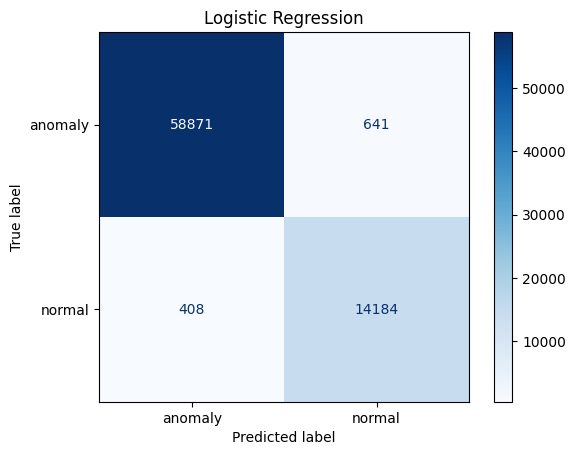

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



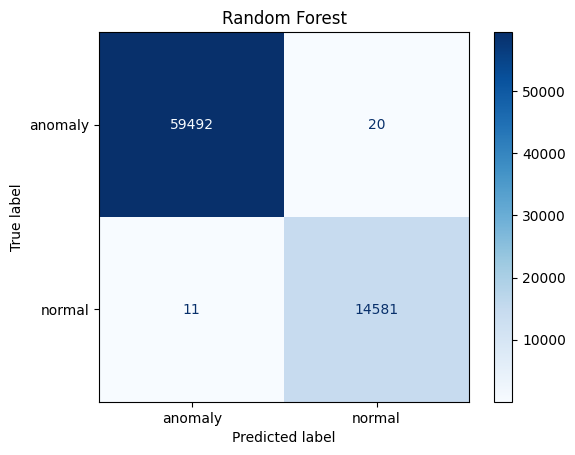

=== KNN ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



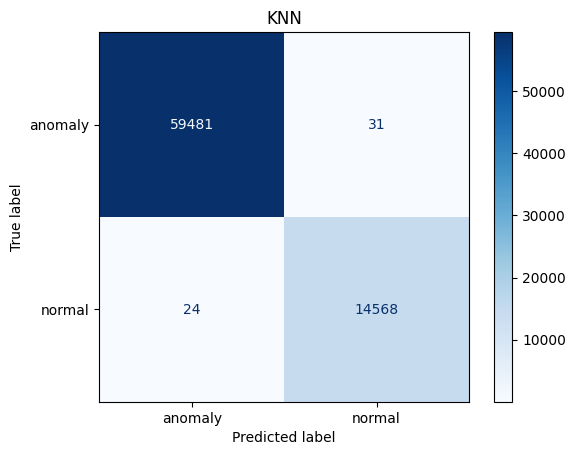

=== DNN ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



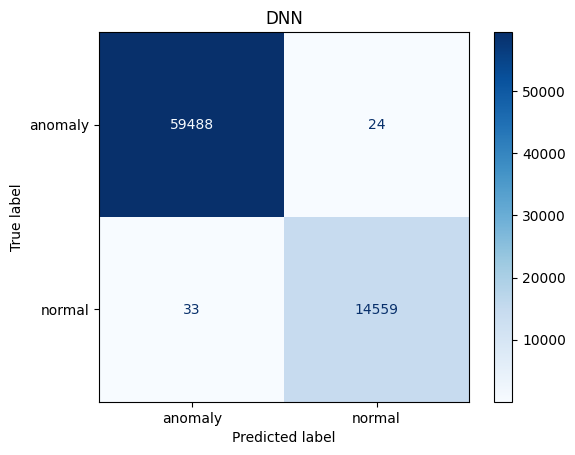

In [ ]:
# Model Evaluation
print("Original Dataset Evaluation")
models = {
    "Logistic Regression": lr_pred,
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "DNN": dnn_pred
}

for name, pred in models.items():
    print(f"=== {name} ===")
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(name)
    plt.show()

In [ ]:
# Define and train GAN
def build_generator(input_dim, output_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(128)(input_layer)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    output_layer = Dense(output_dim, activation="tanh")(x)
    return Model(input_layer, output_layer)

def build_discriminator(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(256)(input_layer)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(128)(x)
    x = LeakyReLU(alpha=0.2)(x)
    output_layer = Dense(1, activation="sigmoid")(x)
    return Model(input_layer, output_layer)

latent_dim = 100
input_dim = X_train.shape[1]

# Build and compile GAN components
generator = build_generator(latent_dim, input_dim)
discriminator = build_discriminator(input_dim)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

discriminator.trainable = False
z = Input(shape=(latent_dim,))
generated_data = generator(z)
validity = discriminator(generated_data)
gan = Model(z, validity)
gan.compile(optimizer=Adam(0.0002, 0.5), loss="binary_crossentropy")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Training GAN
epochs = 100
batch_size = 64

X_train_real = X_train
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

for epoch in range(epochs):
    idx = np.random.randint(0, X_train_real.shape[0], batch_size)
    real_data = X_train_real[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_data, real_label)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_label)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_label)

    if epoch % 10 == 0:
        print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7221546173095703, acc.: 18.75] [G loss: [array(0.7273244, dtype=float32), array(0.7273244, dtype=float32), array(0.171875, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10 [D loss: 0.7389270663261414, acc.: 14.470034837722778] [G loss: [array(0.7402505, dtype=float32), array(0.7402505, dtype=float32), array(0.14133523, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
20 [D loss: 0.7541483640670776, acc.: 13.932745158672333] [G loss: [array(0.75541264, dtype=float32), array(0

In [ ]:
# Generate synthetic data
noise = np.random.normal(0, 1, (10000, latent_dim))
synthetic_data = generator.predict(noise)

# Apply synthetic data to models
synthetic_labels = np.ones((synthetic_data.shape[0],))
X_train_synthetic = np.vstack((X_train_real, synthetic_data))
y_train_synthetic = np.hstack((y_train, synthetic_labels))

# Retrain and evaluate models on synthetic data
print("Synthetic Dataset Evaluation")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic Dataset Evaluation


In [ ]:
# Logistic Regression
lr.fit(X_train_synthetic, y_train_synthetic)
lr_pred_syn = lr.predict(X_test)

max_iter reached after 132 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Random Forest
rf.fit(X_train_synthetic, y_train_synthetic)
rf_pred_syn = rf.predict(X_test)

In [ ]:
# KNN
knn.fit(X_train_synthetic, y_train_synthetic)
knn_pred_syn = knn.predict(X_test)

In [ ]:
# DNN
dnn.fit(X_train_synthetic, y_train_synthetic)
dnn_pred_syn = dnn.predict(X_test)

=== Logistic Regression (Synthetic Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       0.98      0.99      0.99     14592

    accuracy                           1.00     74104
   macro avg       0.99      0.99      0.99     74104
weighted avg       1.00      1.00      1.00     74104



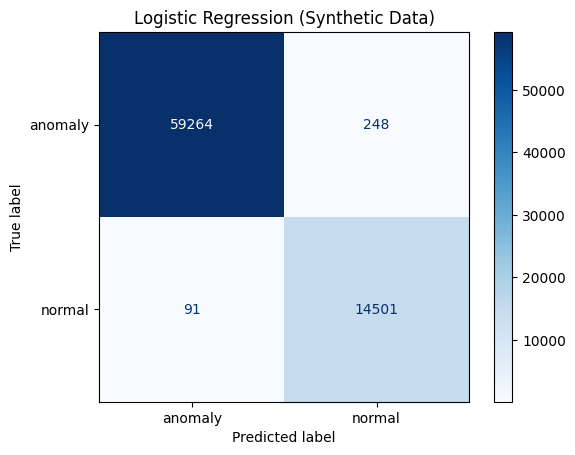

=== Random Forest (Synthetic Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



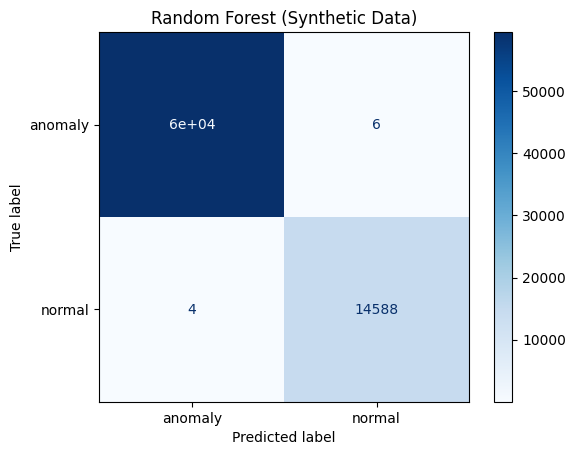

=== KNN (Synthetic Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



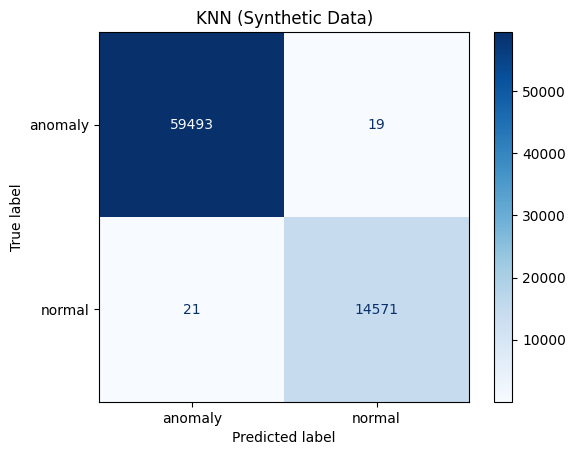

=== DNN (Synthetic Data) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59512
           1       1.00      1.00      1.00     14592

    accuracy                           1.00     74104
   macro avg       1.00      1.00      1.00     74104
weighted avg       1.00      1.00      1.00     74104



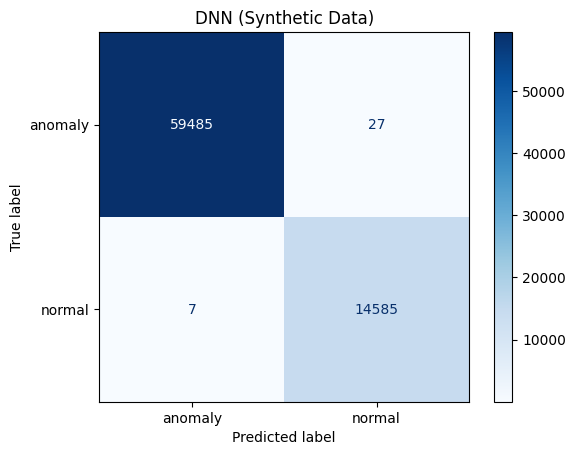

In [ ]:
models_syn = {
    "Logistic Regression": lr_pred_syn,
    "Random Forest": rf_pred_syn,
    "KNN": knn_pred_syn,
    "DNN": dnn_pred_syn
}

for name, pred in models_syn.items():
    print(f"=== {name} (Synthetic Data) ===")
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} (Synthetic Data)")
    plt.show()

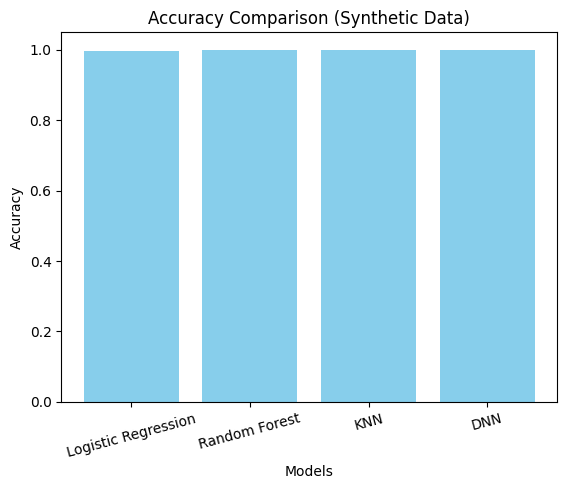

In [ ]:
# Accuracy Comparison
accuracies_syn = {name: accuracy_score(y_test, pred) for name, pred in models_syn.items()}
plt.bar(accuracies_syn.keys(), accuracies_syn.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Synthetic Data)")
plt.xticks(rotation=15)
plt.show()